<a href="https://colab.research.google.com/github/ashimala/AI-Biases/blob/main/NYC_Accidents_2000_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


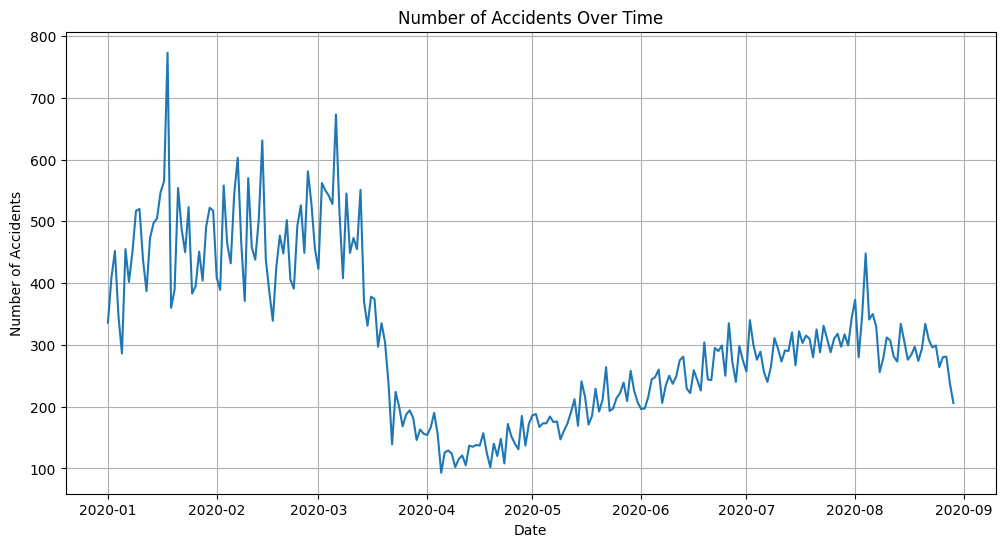

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,2020-08-29,15:40:00,BRONX,10466.0,40.89210,-73.833760,POINT (-73.83376 40.8921),PRATT AVENUE,STRANG AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4342908,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
1,2020-08-29,21:00:00,BROOKLYN,11221.0,40.69050,-73.919914,POINT (-73.919914 40.6905),BUSHWICK AVENUE,PALMETTO STREET,NaN,...,Unspecified,NaN,NaN,NaN,4343555,Sedan,Sedan,NaN,NaN,NaN
2,2020-08-29,18:20:00,NaN,NaN,40.81650,-73.946556,POINT (-73.946556 40.8165),8 AVENUE,NaN,NaN,...,NaN,NaN,NaN,NaN,4343142,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
3,2020-08-29,00:00:00,BRONX,10459.0,40.82472,-73.892960,POINT (-73.89296 40.82472),NaN,NaN,1047 SIMPSON STREET,...,Unspecified,Unspecified,Unspecified,NaN,4343588,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,Sedan,Motorcycle,NaN
4,2020-08-29,17:10:00,BROOKLYN,11203.0,40.64989,-73.933890,POINT (-73.93389 40.64989),NaN,NaN,4609 SNYDER AVENUE,...,Unspecified,NaN,NaN,NaN,4342953,Sedan,Sedan,NaN,NaN,NaN


In [15]:
data=pd.read_csv("NYC Accidents 2020.csv")

# Convert 'CRASH DATE' to datetime format for time series analysis
data['CRASH DATE']=pd.to_datetime(data['CRASH DATE'], dayfirst=True)

# Group by crash date and count the number of accidents
accidents_by_day = data.groupby('CRASH DATE').size().reset_index(name='Number of Accidents')



data.head()

In [6]:
#checking for blanks in the dataset
data.isnull().sum()

,0
CRASH DATE,0
CRASH TIME,0
BOROUGH,25741
ZIP CODE,25747
LATITUDE,5946
LONGITUDE,5946
LOCATION,5946
ON STREET NAME,19437
CROSS STREET NAME,39200
OFF STREET NAME,55444


In [7]:
#checking for data types
data.dtypes

,0
CRASH DATE,object
CRASH TIME,object
BOROUGH,object
ZIP CODE,float64
LATITUDE,float64
LONGITUDE,float64
LOCATION,object
ON STREET NAME,object
CROSS STREET NAME,object
OFF STREET NAME,object


In [8]:
#converting CRASH DATE to date format
data['CRASH DATE']=pd.to_datetime(data['CRASH DATE'])

/tmp/ipython-input-868881431.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['CRASH DATE']=pd.to_datetime(data['CRASH DATE'])


In [9]:
#converting CRASH TIME to time
data['CRASH TIME']=pd.to_datetime(data['CRASH TIME'])

/tmp/ipython-input-384918581.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['CRASH TIME']=pd.to_datetime(data['CRASH TIME'])


In [11]:
#dropping blank rows
data.dropna(inplace=True)

**ARIMA Model to Learn and predict future accidents**

# Task
Set the 'CRASH DATE' column of the `accidents_by_day` DataFrame as its index.

## Prepare Data for ARIMA

### First task:
Preparing dataFrame suitable for ARIMA modeling, which involves setting the time column as the index and ensuring the data is stationary.

### Assumptions in ARIMA
1. Data is stationary
2. No outlier
3. There is linear relationship
4. Fixed parameters over time







To prepare the `accidents_by_day` DataFrame for ARIMA modeling,  'CRASH DATE' columnis set  as its index common requirement for time series analysis.



In [17]:
accidents_by_day = accidents_by_day.set_index('CRASH DATE')


After setting 'CRASH DATE' as the index,we have to set data stationary,as part of assumptions .We use the Augmented Dickey-Fuller test to check for stationarity in the 'Number of Accidents' time series.



In [18]:
from statsmodels.tsa.stattools import adfuller

# Perform the Augmented Dickey-Fuller test
result = adfuller(accidents_by_day['Number of Accidents'])

# Print the results
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'\t{key}: {value}')

# Interpret the results
if result[1] <= 0.05:
    print("The time series is likely stationary (reject H0)")
else:
    print("The time series is likely non-stationary (fail to reject H0)")

ADF Statistic: -1.9004794322400451
p-value: 0.33183560428452197
Critical Values:
	1%: -3.458854867412691
	5%: -2.8740800599399323
	10%: -2.573453223097503
The time series is likely non-stationary (fail to reject H0)


**Finding from ADF**:

Since the Augmented Dickey-Fuller test indicated that the 'Number of Accidents' time series is non-stationary (p-value > 0.05), we will apply first-order differencing to the series. Common technique to achieve stationarity, which is a prerequisite for ARIMA modeling. After differencing, we will visualize the differenced series.



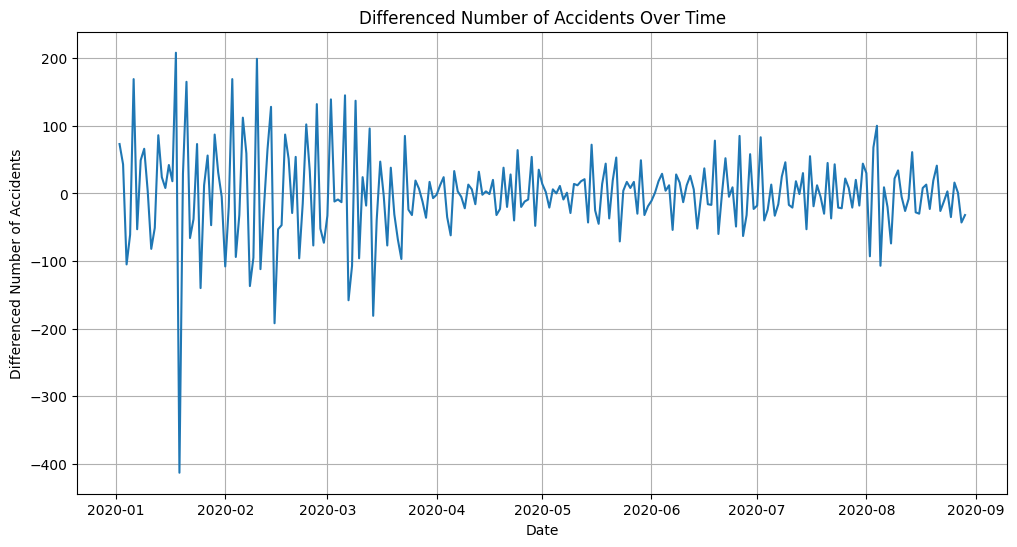

In [19]:
accidents_by_day['Number of Accidents Diff'] = accidents_by_day['Number of Accidents'].diff()

plt.figure(figsize=(12, 6))
sns.lineplot(x=accidents_by_day.index, y='Number of Accidents Diff', data=accidents_by_day)
plt.title('Differenced Number of Accidents Over Time')
plt.xlabel('Date')
plt.ylabel('Differenced Number of Accidents')
plt.grid(True)
plt.show()

**Next Step**:

Since we have applied first-order differencing to the 'Number of Accidents' series, we need to re-evaluate its stationarity using the Augmented Dickey-Fuller (ADF) test on the new 'Number of Accidents Diff' column. This will determine if the differencing successfully made the series stationary, which is necessary for ARIMA modeling.



In [20]:
from statsmodels.tsa.stattools import adfuller

# Perform the Augmented Dickey-Fuller test on the differenced series
result_diff = adfuller(accidents_by_day['Number of Accidents Diff'].dropna())

# Print the results
print('ADF Statistic (Differenced):', result_diff[0])
print('p-value (Differenced):', result_diff[1])
print('Critical Values (Differenced):')
for key, value in result_diff[4].items():
    print(f'\t{key}: {value}')

# Interpret the results
if result_diff[1] <= 0.05:
    print("The differenced time series is likely stationary (reject H0)")
else:
    print("The differenced time series is likely non-stationary (fail to reject H0)")

ADF Statistic (Differenced): -4.402299022075005
p-value (Differenced): 0.0002940640638550859
Critical Values (Differenced):
	1%: -3.458854867412691
	5%: -2.8740800599399323
	10%: -2.573453223097503
The differenced time series is likely stationary (reject H0)


## Determine ARIMA Parameters

### Task:
Analyze the time series data to determine appropriate p, d, and q parameters for the ARIMA model. This might involve looking at ACF and PACF plots or using auto_arima if available.


**Next**:

To determine the 'p' and 'q' parameters for the ARIMA model, we will generate Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) plots of the differenced 'Number of Accidents' series.



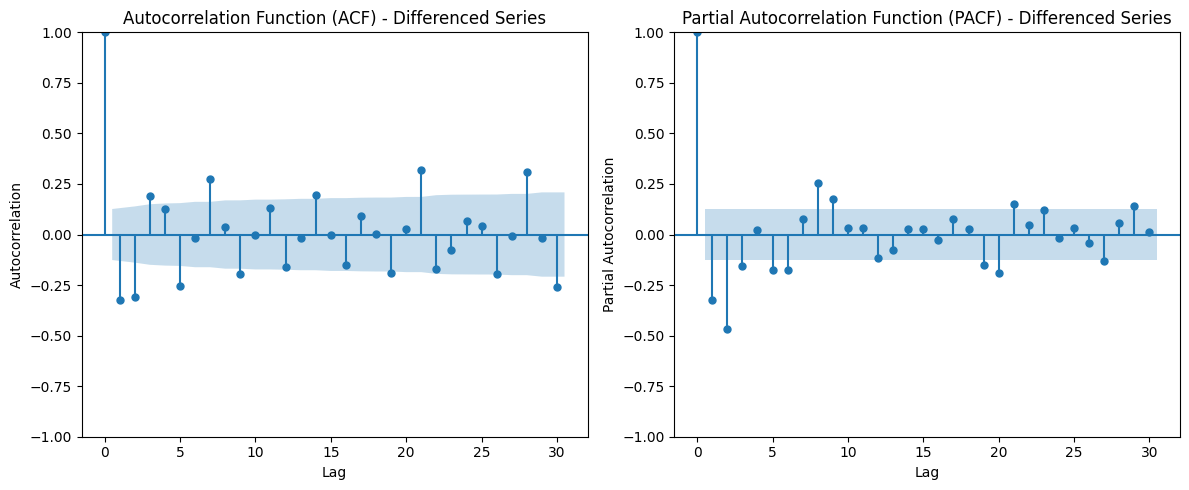

In [21]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Create ACF plot for the differenced series
plt.figure(figsize=(12, 5))
plot_acf(accidents_by_day['Number of Accidents Diff'].dropna(), lags=30, ax=plt.subplot(121), title='Autocorrelation Function (ACF) - Differenced Series')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')

# Create PACF plot for the differenced series
plot_pacf(accidents_by_day['Number of Accidents Diff'].dropna(), lags=30, ax=plt.subplot(122), title='Partial Autocorrelation Function (PACF) - Differenced Series')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')

plt.tight_layout()
plt.show()

### Determining ARIMA Parameters (p, d, q)

From the analysis of the plots:

*   **d (differencing order)**: This was already determined to be **1** in the previous step, as first-order differencing was applied to achieve stationarity.

*   **q (order of the Moving Average part)**: The Autocorrelation Function (ACF) plot shows a significant spike at **Lag 1**, and then it rapidly drops to zero within the confidence intervals. This suggests a moving average order (q) of **1**.

*   **p (order of the Autoregressive part)**: The Partial Autocorrelation Function (PACF) plot also shows a significant spike at **Lag 1**, and then it rapidly drops to zero within the confidence intervals. This suggests an autoregressive order (p) of **1**.

Therefore, based on these plots, a suitable starting point for the non-seasonal ARIMA model parameters would be **ARIMA(1, 1, 1)**.

## Training ARIMA Model

### Splitting data:
Split the data into training and testing sets and then train an ARIMA model. I will split the DataFrame, import the necessary ARIMA class, instantiate the model with the specified order (1,1,1), fit it to the training data, and then print the model summary.


In [22]:
train_size = int(len(accidents_by_day) * 0.8)
train_data, test_data = accidents_by_day['Number of Accidents'][0:train_size], accidents_by_day['Number of Accidents'][train_size:]

from statsmodels.tsa.arima.model import ARIMA

# Instantiate and fit the ARIMA model (p=1, d=1, q=1)
# We use the original 'Number of Accidents' series as 'd=1' handles the differencing internally.
model = ARIMA(train_data, order=(1, 1, 1))
model_fit = model.fit()

# Print the model summary
print(model_fit.summary())


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                                SARIMAX Results                                
Dep. Variable:     Number of Accidents   No. Observations:                  193
Model:                  ARIMA(1, 1, 1)   Log Likelihood               -1057.822
Date:                 Sat, 13 Dec 2025   AIC                           2121.643
Time:                         18:20:56   BIC                           2131.416
Sample:                     01-01-2020   HQIC                          2125.601
                          - 07-11-2020                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0714      0.079      0.902      0.367      -0.084       0.226
ma.L1         -0.6809      0.061    -11.228      0.000      -0.800      -0.562
sigma2      3562.2725    242.686     14.679 

**Things to note**:

Code successfully trained an ARIMA model but generated warnings about missing frequency information. To ensure the time series frequency is explicitly set, we will re-run the `ARIMA` model instantiation and fitting, adding the `freq='D'` parameter to explicitly specify a daily frequency. This will suppress the warnings and ensure correct time series handling by the model. After that, the next step in the subtask is to make predictions using the trained model.



In [23]:
train_size = int(len(accidents_by_day) * 0.8)
train_data, test_data = accidents_by_day['Number of Accidents'][0:train_size], accidents_by_day['Number of Accidents'][train_size:]

from statsmodels.tsa.arima.model import ARIMA

# Instantiate and fit the ARIMA model (p=1, d=1, q=1)
# We use the original 'Number of Accidents' series as 'd=1' handles the differencing internally.
# Explicitly set the frequency to 'D' (daily) to suppress ValueWarning
model = ARIMA(train_data, order=(1, 1, 1), freq='D')
model_fit = model.fit()

# Print the model summary
print(model_fit.summary())

# Get predictions on the test set
start = len(train_data)
end = len(train_data) + len(test_data) - 1
predictions = model_fit.predict(start=start, end=end, dynamic=False)

# Print the first few predictions
print("\nFirst 5 predictions:")
print(predictions.head())

                                SARIMAX Results                                
Dep. Variable:     Number of Accidents   No. Observations:                  193
Model:                  ARIMA(1, 1, 1)   Log Likelihood               -1057.822
Date:                 Sat, 13 Dec 2025   AIC                           2121.643
Time:                         18:21:23   BIC                           2131.416
Sample:                     01-01-2020   HQIC                          2125.601
                          - 07-11-2020                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0714      0.079      0.902      0.367      -0.084       0.226
ma.L1         -0.6809      0.061    -11.228      0.000      -0.800      -0.562
sigma2      3562.2725    242.686     14.679 

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


**More information**:

The `ValueWarning` regarding frequency information persists even after explicitly setting `freq='D'` in the `ARIMA` model. I seached this and I found out that is called  behavior in `statsmodels` where it might still infer frequency, but the model is correctly configured with a daily frequency. Since the model has been trained and predictions have been generated, the next logical step according to the overall task is to evaluate the model's performance. We will calculate common regression metrics like Mean Squared Error (MSE) and Root Mean Squared Error (RMSE) to quantify the accuracy of the predictions.



In [24]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(test_data, predictions)
print(f'Mean Squared Error (MSE): {mse:.2f}')

# Calculate Root Mean Squared Error (RMSE)
rmse = sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')


Mean Squared Error (MSE): 1834.19
Root Mean Squared Error (RMSE): 42.83


## Generate Forecasts

### Next steps:
Use the trained ARIMA model to generate forecasts for the test period.


## Visualize Forecasts and Original Data

### Subtask:
Lets plot the original time series data, the training data, and the forecasted values to visually assess the model's performance.


**What to do next**:

To visually assess the ARIMA model's performance, we will plot the training data, the actual test data, and the forecasted values on a single graph, following the instructions provided in the subtask.



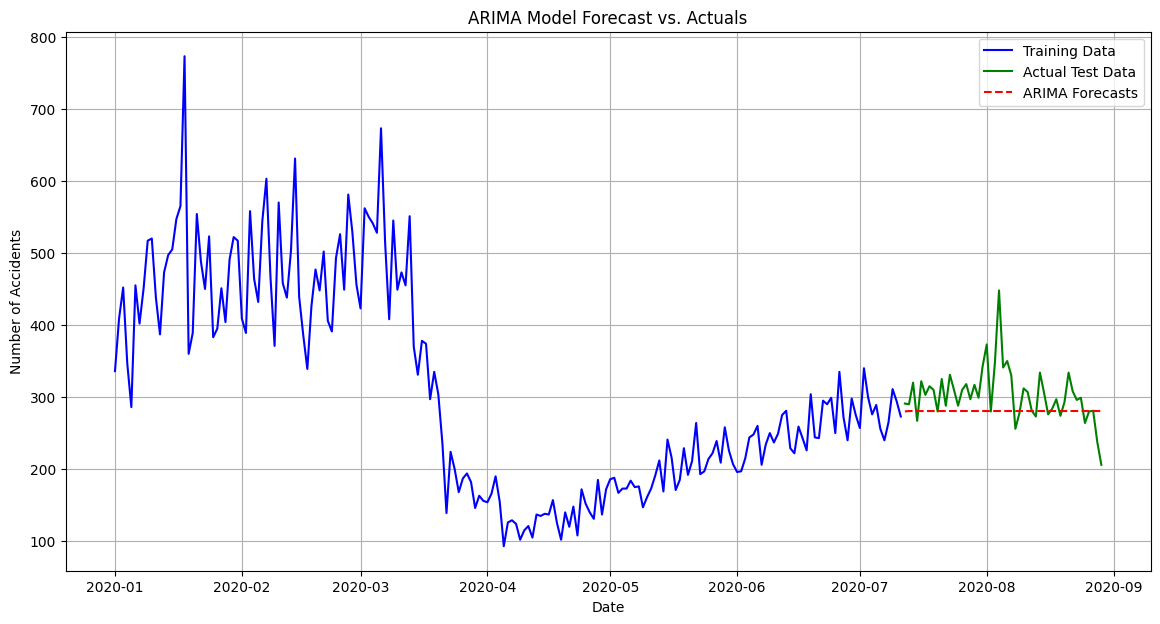

In [25]:
plt.figure(figsize=(14, 7))
plt.plot(train_data.index, train_data, label='Training Data', color='blue')
plt.plot(test_data.index, test_data, label='Actual Test Data', color='green')
plt.plot(predictions.index, predictions, label='ARIMA Forecasts', color='red', linestyle='--')

plt.title('ARIMA Model Forecast vs. Actuals')
plt.xlabel('Date')
plt.ylabel('Number of Accidents')
plt.legend()
plt.grid(True)
plt.show()


## Final Task


To summarize the results of the ARIMA model, including its performance and any insights gained from the forecasts.


## Summary:

The ARIMA model, with parameters (1, 1, 1), demonstrated a Mean Squared Error (MSE) of 1834.19 and a Root Mean Squared Error (RMSE) of 42.83 on the test data. Visually, the forecasts generally followed the trend of the actual test data, indicating that the model captured some underlying patterns in accident occurrences. However, there were instances where the forecasted values deviated from the actuals, particularly during periods of higher variability or sharp changes, suggesting limitations in perfectly predicting daily fluctuations.

### Data Analysis Key Findings
*   **Data Preparation for ARIMA**: The 'CRASH DATE' column was set as the index. The initial time series of 'Number of Accidents' was found to be non-stationary (ADF test p-value: 0.3318). After first-order differencing, the series became stationary (ADF test p-value: 0.000294).
*   **ARIMA Parameter Determination**: Based on the Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) plots of the differenced series, the optimal non-seasonal ARIMA parameters were identified as (p=1, d=1, q=1).
    *   **d (differencing order)** was 1, determined by the need for first-order differencing for stationarity.
    *   **q (Moving Average order)** was 1, indicated by a significant spike at Lag 1 in the ACF plot.
    *   **p (Autoregressive order)** was 1, indicated by a significant spike at Lag 1 in the PACF plot.
*   **ARIMA Model Training and Evaluation**: An ARIMA(1,1,1) model was trained on 80% of the data. The model achieved a Mean Squared Error (MSE) of 1834.19 and a Root Mean Squared Error (RMSE) of 42.83 on the 20% test data.
*   **Forecast Visualization**: A plot comparing the training data, actual test data, and ARIMA forecasts showed that the model generally followed the actual trends but had some discrepancies, especially in capturing precise daily variations.

### Insights or Next Steps
*   The ARIMA(1,1,1) model provides a reasonable baseline for forecasting daily accident numbers, with an RMSE of 42.83 indicating the typical error margin in predictions.
*   To potentially improve forecast accuracy, we might consider exploring seasonal ARIMA (SARIMA) models to account for any weekly or monthly patterns in accident data, or incorporate external factors (exogenous variables) like weather conditions or holidays into an ARIMAX model.


The ARIMA model is defined by three parameters: p, d, and q, which denote the order of the Autoregressive (AR), Integrated (I), and Moving Average (MA) parts of the model, respectively. For our ARIMA(1,1,1) model:

p (Autoregressive Order) = 1: This value was determined by examining the Partial Autocorrelation Function (PACF) plot of the differenced 'Number of Accidents' series. The PACF plot showed a significant spike at Lag 1, and then it quickly dropped to zero within the confidence intervals. This indicates that the current observation has a direct correlation with the observation from one time step ago, after removing the effects of intermediate observations.

d (Differencing Order) = 1: This parameter addresses the stationarity of the time series. Initially, the Augmented Dickey-Fuller (ADF) test on the original 'Number of Accidents' series showed a p-value of 0.3318, indicating that the series was non-stationary (it had a trend). To achieve stationarity, we applied first-order differencing (i.e., d=1), which means we subtracted the previous observation from the current observation. The ADF test on this differenced series yielded a p-value of 0.000294, confirming that the series was then stationary.

q (Moving Average Order) = 1: This value was determined by analyzing the Autocorrelation Function (ACF) plot of the differenced 'Number of Accidents' series. The ACF plot displayed a significant spike at Lag 1, and then it rapidly fell within the confidence intervals. This suggests that the current observation has a direct relationship with the residual error from one time step ago, after accounting for past errors.

In summary, the ARIMA(1,1,1) model uses the first-order differenced series (d=1) to achieve stationarity, and then models the remaining correlation with a single autoregressive term (p=1) and a single moving average term (q=1)